# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [98]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [99]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [114]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="

# set up lists to hold response info
weather = []
weather_dict = []
set_no = 1
count_set = 0
# Loop through the list of cities and perform a request for data on each.
for i, city in enumerate (cities, start =1):
    try:
        final_url = query_url + city
        response = requests.get(final_url).json()
        weather.append(response['weather'][0]['main'])
        count_set+=1
        print(f'Processing Record {count_set}, of Set {set_no} | {city}')
        lat = response['coord']['lat']
        weather_dict.append({'City': city, 'Lat': response['coord']['lat'],
                        'Lng': response['coord']['lon'],'Max Temp': response['main']['temp'],
                        'Humidity': response['main']['humidity'], 'Cloudiness': response['clouds']['all'],
                        'Wind Speed': response['wind']['speed'],'Country': response['sys']['country'],
                        'Date': response['dt']})
        
        if count_set % 50 == 0:
            set_no+=1
            count_set = 0
    except KeyError:
        weather.append("City " + city + " not found.")
        print(f'City {city} not found')

Processing Record 1, of Set 1 | krasnyy yar
Processing Record 2, of Set 1 | punta arenas
Processing Record 3, of Set 1 | ushuaia
Processing Record 4, of Set 1 | san policarpo
Processing Record 5, of Set 1 | cleburne
Processing Record 6, of Set 1 | necochea
Processing Record 7, of Set 1 | labuhan
Processing Record 8, of Set 1 | zhuanghe
Processing Record 9, of Set 1 | bluff
Processing Record 10, of Set 1 | rikitea
Processing Record 11, of Set 1 | longyearbyen
Processing Record 12, of Set 1 | ostrovnoy
Processing Record 13, of Set 1 | shimoda
Processing Record 14, of Set 1 | palmer
Processing Record 15, of Set 1 | yarkovo
Processing Record 16, of Set 1 | kaitangata
Processing Record 17, of Set 1 | cabo san lucas
Processing Record 18, of Set 1 | khatanga
Processing Record 19, of Set 1 | marawi
City urdzhar not found
Processing Record 20, of Set 1 | caravelas
Processing Record 21, of Set 1 | hilo
City mrirt not found
Processing Record 22, of Set 1 | kongolo
City samusu not found
Processing

Processing Record 35, of Set 4 | grand forks
Processing Record 36, of Set 4 | mahebourg
Processing Record 37, of Set 4 | upernavik
Processing Record 38, of Set 4 | bandipur
Processing Record 39, of Set 4 | grindavik
Processing Record 40, of Set 4 | nouakchott
Processing Record 41, of Set 4 | jewar
Processing Record 42, of Set 4 | dubai
Processing Record 43, of Set 4 | sao raimundo nonato
Processing Record 44, of Set 4 | emerald
Processing Record 45, of Set 4 | adrar
City tsihombe not found
Processing Record 46, of Set 4 | juneau
Processing Record 47, of Set 4 | qaanaaq
Processing Record 48, of Set 4 | copiapo
City marcona not found
Processing Record 49, of Set 4 | kurilsk
Processing Record 50, of Set 4 | ribeira grande
Processing Record 1, of Set 5 | manzhouli
City shkotovo-26 not found
Processing Record 2, of Set 5 | razole
Processing Record 3, of Set 5 | sinnamary
Processing Record 4, of Set 5 | faya
Processing Record 5, of Set 5 | clyde river
Processing Record 6, of Set 5 | ancud
Pr

Processing Record 19, of Set 8 | asfi
Processing Record 20, of Set 8 | anaconda
Processing Record 21, of Set 8 | lasa
Processing Record 22, of Set 8 | mani
Processing Record 23, of Set 8 | trat
Processing Record 24, of Set 8 | kuvandyk
Processing Record 25, of Set 8 | valentin gomez farias
City milingimbi not found
Processing Record 26, of Set 8 | utica
Processing Record 27, of Set 8 | masuri
City meyungs not found
Processing Record 28, of Set 8 | mount gambier
Processing Record 29, of Set 8 | zonguldak
Processing Record 30, of Set 8 | bozdar
Processing Record 31, of Set 8 | santiago del estero
Processing Record 32, of Set 8 | nemuro
Processing Record 33, of Set 8 | jagodina
Processing Record 34, of Set 8 | aklavik
Processing Record 35, of Set 8 | corinto
Processing Record 36, of Set 8 | nalut
Processing Record 37, of Set 8 | odessa
Processing Record 38, of Set 8 | taua
Processing Record 39, of Set 8 | kapit
Processing Record 40, of Set 8 | sangar
Processing Record 41, of Set 8 | finsc

In [115]:
#Convert Raw Data to DataFrame
#Export the city data into a .csv.
#Display the DataFrame
#City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
# create a data frame from cities, lat, and temp

city_data = pd.DataFrame(weather_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,krasnyy yar,46.5331,48.3456,264.98,67,0,4.00,RU,1612741597
1,punta arenas,-53.1500,-70.9167,294.15,28,0,3.09,CL,1612741597
2,ushuaia,-54.8000,-68.3000,286.15,71,20,3.60,AR,1612741403
3,san policarpo,12.1791,125.5072,299.62,86,100,9.32,PH,1612741597
4,cleburne,32.3476,-97.3867,288.31,39,1,5.14,US,1612741598


In [116]:
city_data.to_csv('CityData.csv',index = False)

In [118]:
city_data.describe(include ='all')
#Max humidity is <100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,542,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542,5.420000e+02
unique,542,NaN,NaN,NaN,NaN,NaN,NaN,113,NaN
top,corpus christi,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,62,NaN
mean,NaN,18.356295,17.974900,282.670185,73.688192,53.057196,3.745793,NaN,1.612742e+09
std,NaN,33.764944,94.588838,17.663654,17.726006,39.310302,2.528995,NaN,1.341514e+02
min,NaN,-54.800000,-179.166700,230.150000,10.000000,0.000000,0.120000,NaN,1.612741e+09
25%,NaN,-9.496350,-68.572175,270.410000,65.000000,11.000000,1.775000,NaN,1.612742e+09
50%,NaN,21.443950,20.521500,289.150000,77.000000,59.500000,3.265000,NaN,1.612742e+09
75%,NaN,46.483575,109.968675,297.392500,87.000000,91.750000,5.110000,NaN,1.612742e+09


In [119]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

Text(0, 0.5, 'Maximum Temperature(F)')

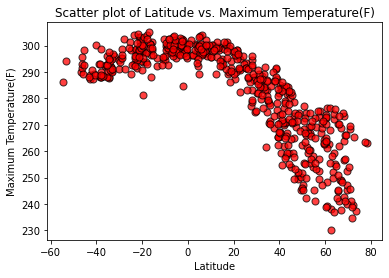

In [120]:
#Latitude vs. Temperature Plot
x_Lat = city_data['Lat']
y_MaxTemp = city_data['Max Temp']
plt.scatter(x_Lat,y_MaxTemp,marker ='o', facecolors = 'red',edgecolors = 'black', s=50,alpha=0.75)
plt.title('Scatter plot of Latitude vs. Maximum Temperature(F)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature(F)')
#plt.savefig("../Images/ScatterplotLatitudevsTemp.png")

Text(0, 0.5, 'Humidity')

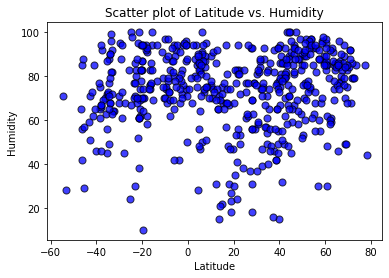

In [121]:
#Latitude vs. Humidity Plot
x_Lat = city_data['Lat']
y_Humidity = city_data['Humidity']
plt.scatter(x_Lat,y_Humidity,marker ='o', facecolors = 'blue',edgecolors = 'black', s=50,alpha=0.75)
plt.title('Scatter plot of Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#plt.savefig("../Images/ScatterplotLatitudevsHumidity.png")

Text(0, 0.5, 'Cloudiness')

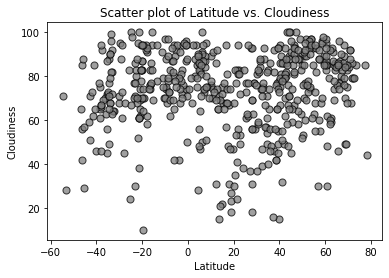

In [122]:
#Latitude vs. Cloudiness Plot
x_Lat = city_data['Lat']
y_Cloud = city_data['Cloudiness']
plt.scatter(x_Lat,y_Humidity,marker ='o', facecolors = 'grey',edgecolors = 'black', s=50,alpha=0.75)
plt.title('Scatter plot of Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#plt.savefig("../Images/ScatterplotLatitudevsCloudiness.png")

Text(0, 0.5, 'Wind Speed')

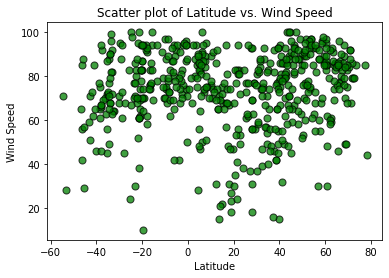

In [123]:
#Latitude vs. Wind Speed Plot
x_Lat = city_data['Lat']
y_WindSpeed = city_data['Wind Speed']
plt.scatter(x_Lat,y_Humidity,marker ='o', facecolors = 'green',edgecolors = 'black', s=50,alpha=0.75)
plt.title('Scatter plot of Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#plt.savefig("../Images/ScatterplotLatitudevsWindSpeed.png")

In [124]:
#Linear Regression
#Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
north_hem = city_data.loc[city_data['Lat']>=0,:].reset_index()
south_hem = city_data.loc[city_data['Lat']<0,:].reset_index()
south_hem

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,punta arenas,-53.1500,-70.9167,294.15,28,0,3.09,CL,1612741597
1,2,ushuaia,-54.8000,-68.3000,286.15,71,20,3.60,AR,1612741403
2,5,necochea,-38.5473,-58.7368,288.15,75,96,6.65,AR,1612741571
3,6,labuhan,-6.8844,112.2051,298.51,87,100,3.96,ID,1612741598
4,8,bluff,-46.6000,168.3333,290.15,65,99,2.07,NZ,1612741598
...,...,...,...,...,...,...,...,...,...,...
176,533,lara,-38.0167,144.4000,288.69,67,90,5.66,AU,1612741884
177,537,vanimo,-2.6741,141.3028,301.75,70,100,1.66,PG,1612741688
178,539,omaruru,-21.4333,15.9333,295.47,38,30,1.59,NA,1612741885
179,540,padang,-0.9492,100.3543,296.15,94,20,1.54,ID,1612741752


The r value, that is, the correlation between both factors is -0.86.


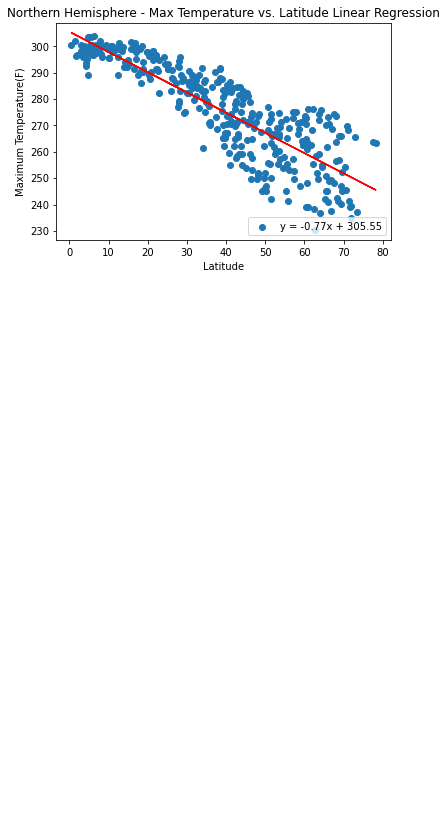

In [125]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_Lat = north_hem['Lat']
y_MaxTemp = north_hem['Max Temp']
correlation = st.pearsonr(x_Lat,y_MaxTemp)
plt.title('Northern Hemisphere - Max Temperature vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature(F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_MaxTemp)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_MaxTemp, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
#plt.savefig("../Images/NorthHemScatterplotLatitudevsMaxTemp.png")

The r value, that is, the correlation between both factors is 0.58.


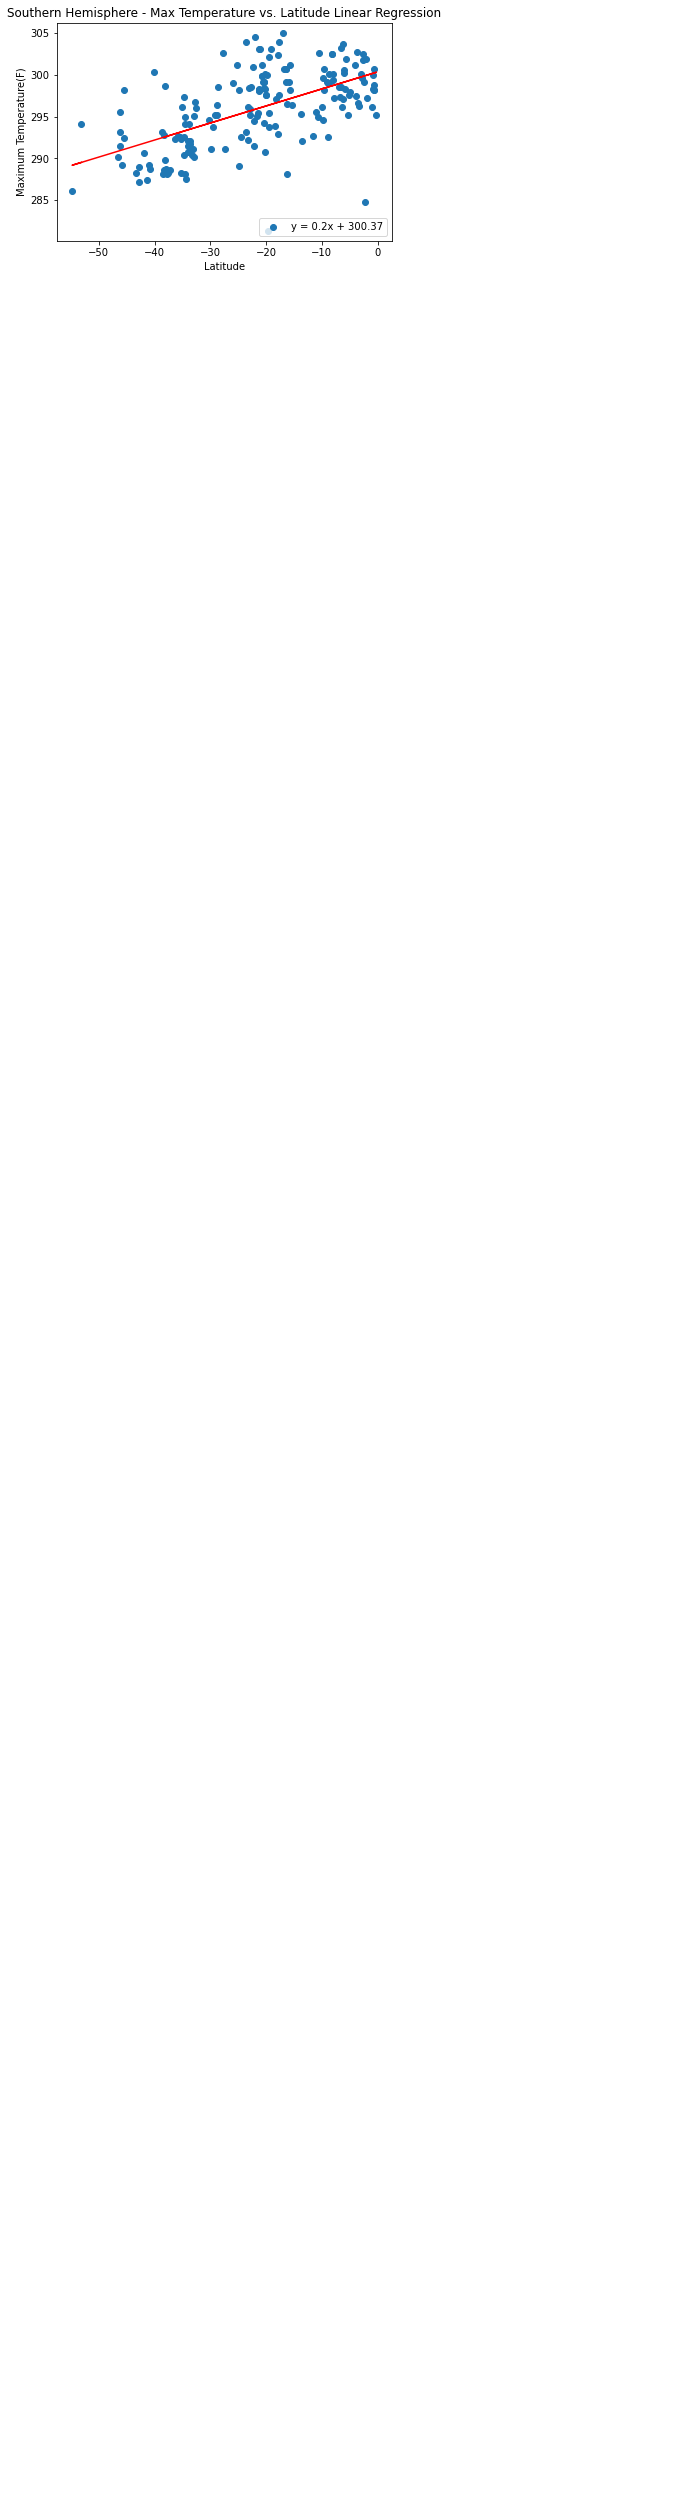

In [126]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_Lat = south_hem['Lat']
y_MaxTemp = south_hem['Max Temp']
correlation = st.pearsonr(x_Lat,y_MaxTemp)
plt.title('Southern Hemisphere - Max Temperature vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature(F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_MaxTemp)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_MaxTemp, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
#plt.savefig("../Images/SouthHemScatterplotLatitudevsMaxTemp.png")

The r value, that is, the correlation between both factors is 0.2.


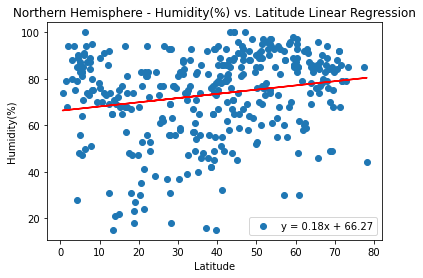

In [127]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_Lat = north_hem['Lat']
y_Humidity = north_hem['Humidity']
correlation = st.pearsonr(x_Lat,y_Humidity)
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Humidity)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_Humidity, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
#plt.savefig("../Images/NorthHemScatterplotLatitudevsHumidity.png")

The r value, that is, the correlation between both factors is 0.3.


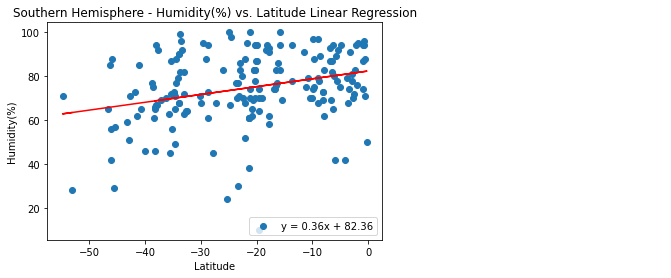

In [128]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_Lat = south_hem['Lat']
y_Humidity = south_hem['Humidity']
correlation = st.pearsonr(x_Lat,y_Humidity)
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Humidity)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_Humidity, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
#plt.savefig("../Images/SouthHemScatterplotLatitudevsHumidity.png")

The r value, that is, the correlation between both factors is 0.14.


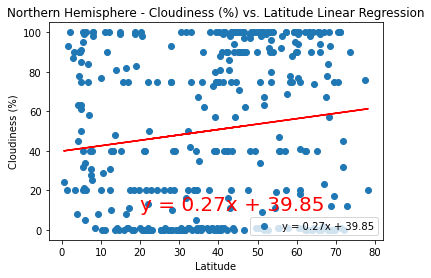

In [129]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶
x_Lat = north_hem['Lat']
y_Cloud = north_hem['Cloudiness']
correlation = st.pearsonr(x_Lat,y_Cloud)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Cloud)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_Cloud, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
#plt.savefig("../Images/NorthHemScatterplotLatitudevsCloudiness.png")

The r value, that is, the correlation between both factors is 0.18.


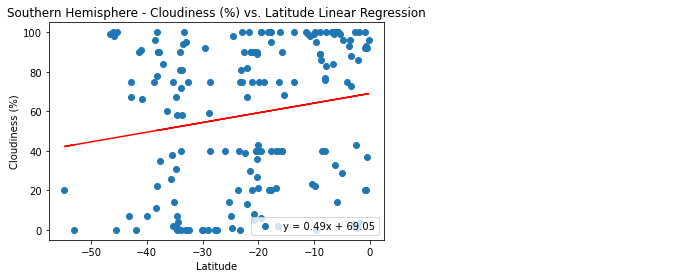

In [130]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_Lat = south_hem['Lat']
y_Cloud = south_hem['Cloudiness']
correlation = st.pearsonr(x_Lat,y_Cloud)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Cloud)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_Cloud, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
#plt.savefig("../Images/SsouthHemScatterplotLatitudevsCloudiness.png")

The r value, that is, the correlation between both factors is 0.17.


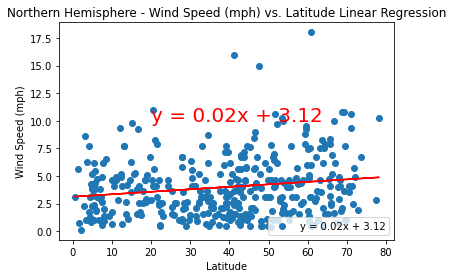

In [131]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_Lat = north_hem['Lat']
y_WindSpeed = north_hem['Wind Speed']
correlation = st.pearsonr(x_Lat,y_WindSpeed)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_WindSpeed)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_WindSpeed, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
#plt.savefig("../Images/NorthHemScatterplotLatitudevsWindSpeed.png")

The r value, that is, the correlation between both factors is -0.14.


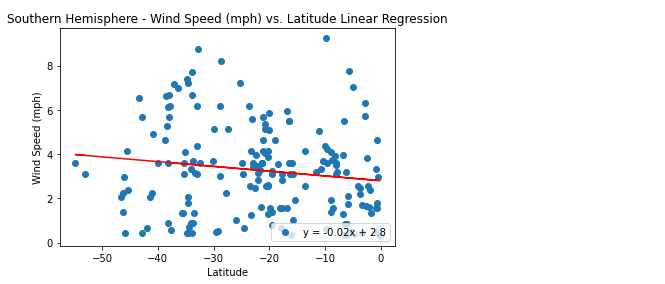

In [132]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_Lat = south_hem['Lat']
y_WindSpeed = south_hem['Wind Speed']
correlation = st.pearsonr(x_Lat,y_WindSpeed)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_WindSpeed)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_WindSpeed, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
#plt.savefig("../Images/SouthHemScatterplotLatitudevsWindSpeed.png")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

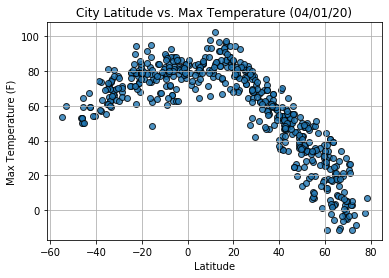

## Latitude vs. Humidity Plot

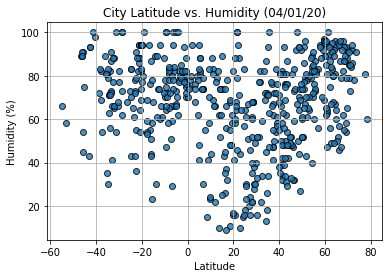

## Latitude vs. Cloudiness Plot

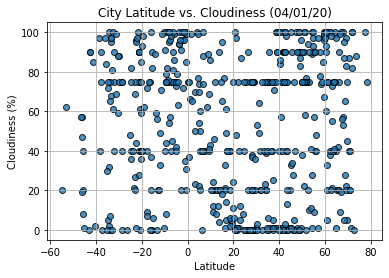

## Latitude vs. Wind Speed Plot

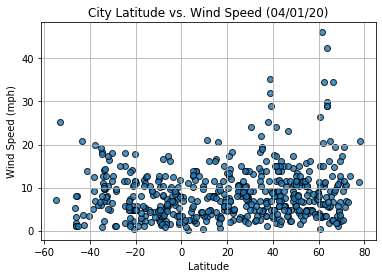

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


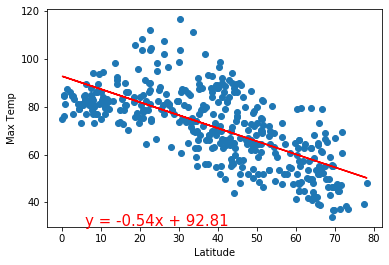

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


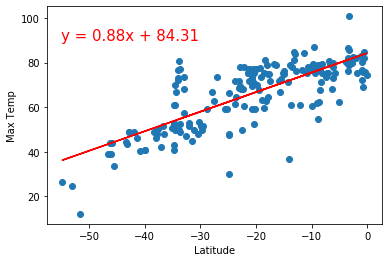

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


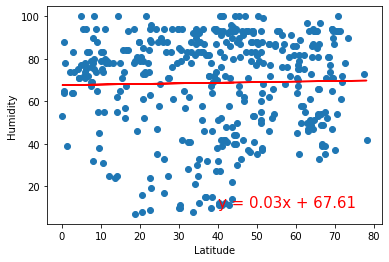

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


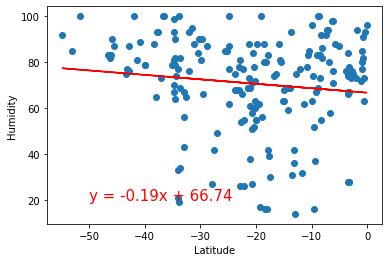

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


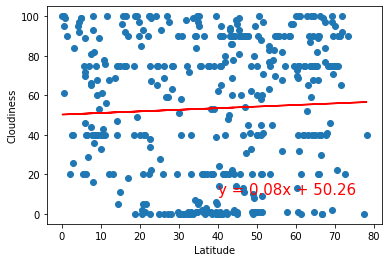

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


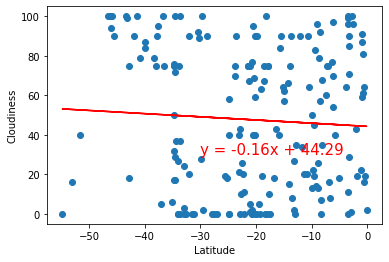

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


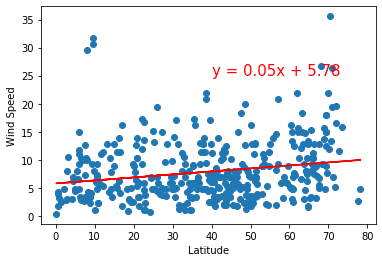

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


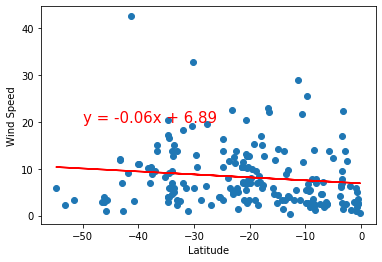